In [1]:
# Working on the same concept with videos as input
# Import the necessary FER() packages for Video Processing
# from https://github.com/rjrahul24/ai-with-python-series/tree/main/07.%20Emotion%20Recognition%20using%20Live%20Video

In [2]:
pip install FER

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/09/63/25e76075081ea98ec48f23929cefee58be0b42212e38074a9ec5c19e838c/tensorflow-2.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cac

  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Using cached tensorflow-2.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (489.9 MB)
Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
Using cached grpcio-1.59.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.3 MB)
Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
Using cached protobuf-4.25.0-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
Using cached tensorflow_io_gcs_filesystem-0.34.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
Using cached google_auth-2.23.4-py2.py3-none-any.whl (183 kB)
Using cached tensorboard_d

In [4]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd
# Put in the location of the video file that has to be processed
location_videofile = "./input/Video_One.mp4"

2023-11-08 19:55:48.849259: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-08 19:55:48.851756: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-08 19:55:48.889216: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 19:55:48.889249: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 19:55:48.889278: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [5]:
# But the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [6]:
# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:30.00 fps, 583 frames, 19.43 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output/Video_One_output.mp4
100%|██████████| 583/583 [03:11<00:00,  3.04frames/s]
INFO:fer:Completed analysis: saved to output/Video_One_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 8%
INFO:fer:Compressing: 17%
INFO:fer:Compressing: 25%
INFO:fer:Compressing: 34%
INFO:fer:Compressing: 42%
INFO:fer:Compressing: 51%
INFO:fer:Compressing: 60%
INFO:fer:Compressing: 68%
INFO:fer:Compressing: 77%
INFO:fer:Compressing: 85%
INFO:fer:Compressing: 94%
INFO:fer:Zip has finished


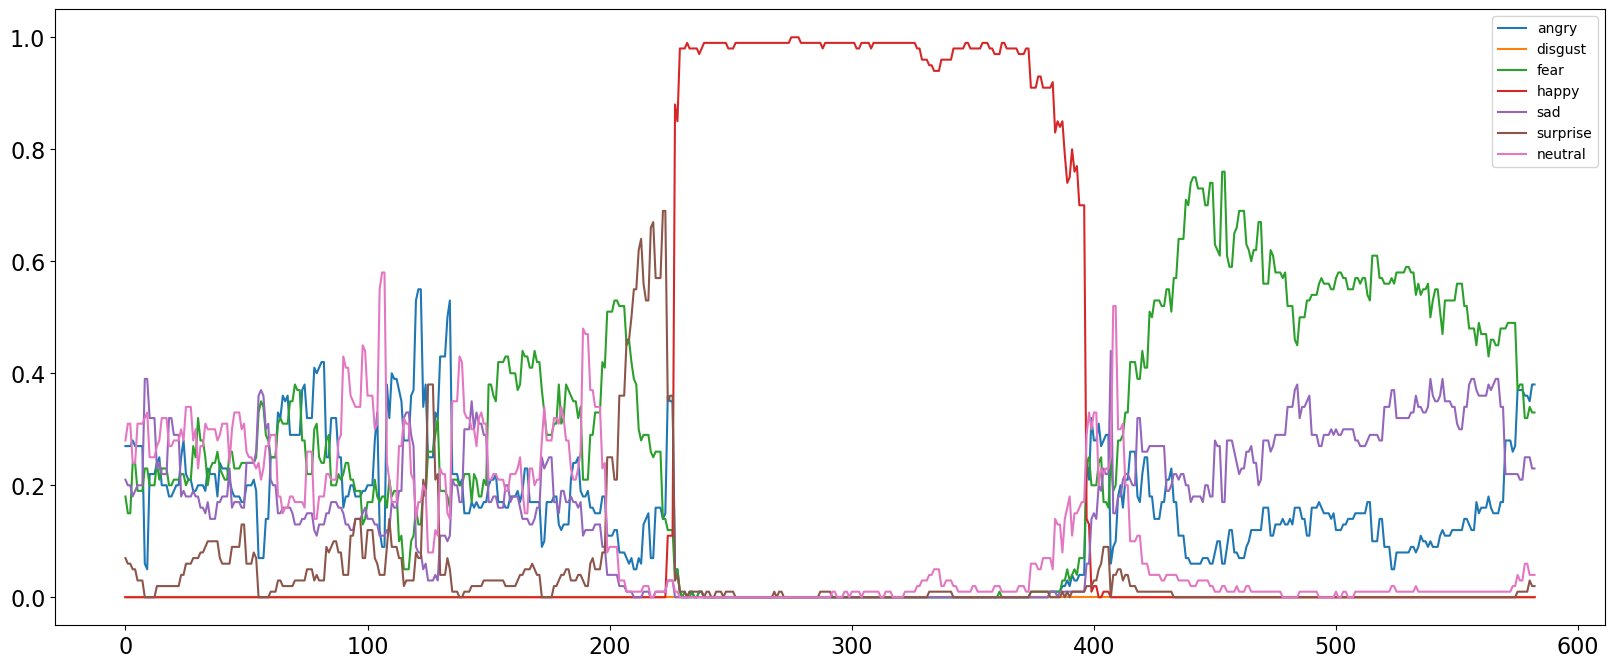

In [7]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [8]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,78.68
1,Disgust,0.00
2,Fear,158.11
3,Happy,164.26
4,Sad,88.19
5,Surprise,25.80
6,Neutral,66.53


INFO:fer:30.00 fps, 458 frames, 15.27 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output/Video_Two_output.mp4
100%|██████████| 458/458 [02:29<00:00,  3.07frames/s]
INFO:fer:Completed analysis: saved to output/Video_Two_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 10%
INFO:fer:Compressing: 21%
INFO:fer:Compressing: 32%
INFO:fer:Compressing: 43%
INFO:fer:Compressing: 54%
INFO:fer:Compressing: 65%
INFO:fer:Compressing: 76%
INFO:fer:Compressing: 87%
INFO:fer:Compressing: 98%
INFO:fer:Zip has finished


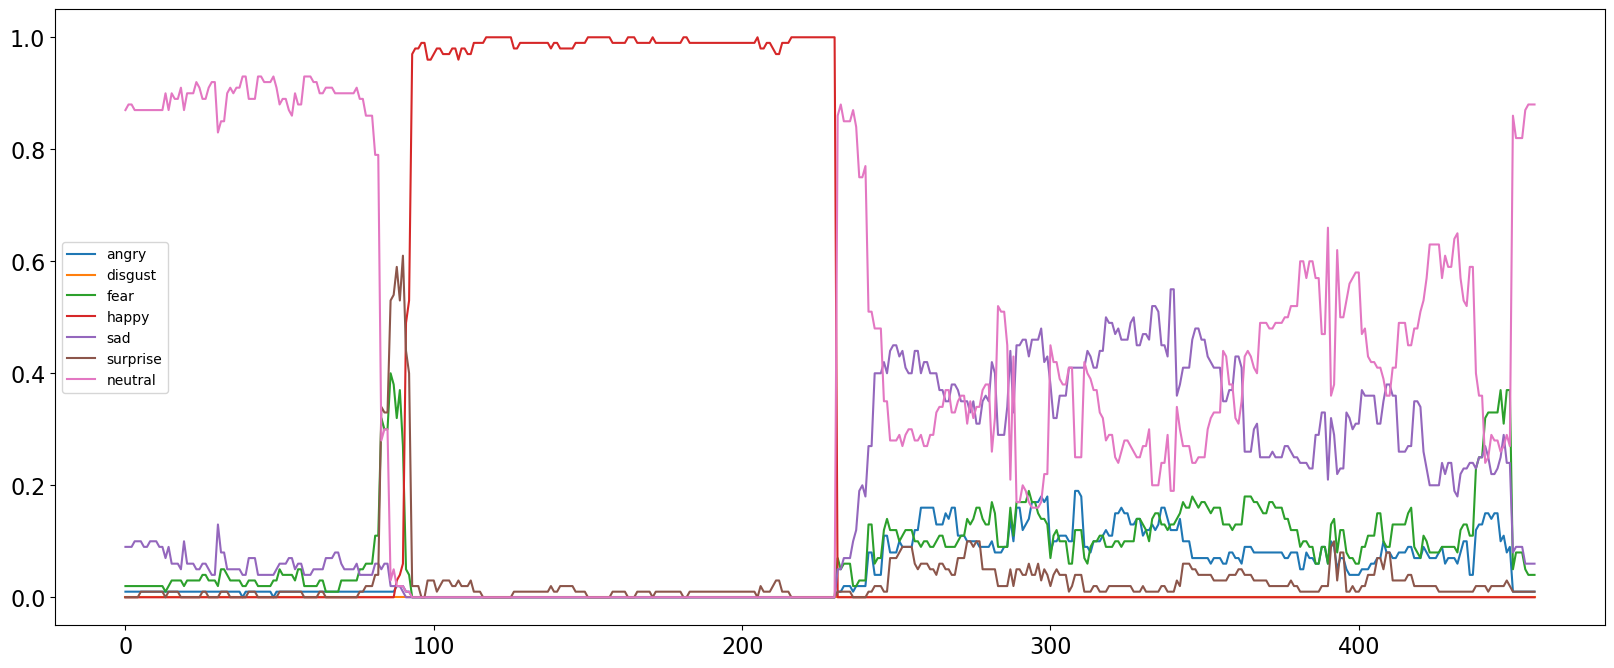

In [10]:
# We will conclude the project by experimenting the code on another video
location_videofile_two = "./input/Video_Two.mp4"
input_video_two = Video(location_videofile_two)
processing_data_two = input_video_two.analyze(face_detector, display=False)

vid_df_2 = input_video_two.to_pandas(processing_data_two)
vid_df_2 = input_video_two.get_first_face(vid_df_2)
vid_df_2 = input_video_two.get_emotions(vid_df_2)

pltfig = vid_df_2.plot(figsize=(20, 8), fontsize=16).get_figure()

In [11]:
angry_2 = sum(vid_df_2.angry)
disgust_2 = sum(vid_df_2.disgust)
fear_2 = sum(vid_df_2.fear)
happy_2 = sum(vid_df_2.happy)
sad_2 = sum(vid_df_2.sad)
surprise_2 = sum(vid_df_2.surprise)
neutral_2 = sum(vid_df_2.neutral)

emotions_values_2 = [angry_2, disgust_2, fear_2, happy_2, sad_2, surprise_2, neutral_2]
score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values_2
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,21.77
1,Disgust,0.00
2,Fear,33.37
3,Happy,137.70
4,Sad,81.00
5,Surprise,13.66
6,Neutral,170.25


In [32]:
# base from: https://www.geeksforgeeks.org/python-opencv-capture-video-from-camera/
# square and on image display: https://www.geeksforgeeks.org/facial-expression-recognizer-using-fer-using-deep-neural-net/
# documentation for fer: ' https://pypi.org/project/fer/ 
# fps from https://www.geeksforgeeks.org/python-displaying-real-time-fps-at-which-webcam-video-file-is-processed-using-opencv/

# imports for fer
from fer import FER
import os
import sys
import pandas as pd

# import the opencv library 
import cv2 

# time for fps
import time 

# clear prev
#cv2.destroyAllWindows() 

# fer detector
detector = FER()

  
# define a video capture object 
vid = cv2.VideoCapture(0) 

# used to record the time when we processed last frame 
prev_frame_time = 0
  
# used to record the time at which we processed current frame 
new_frame_time = 0
  
while(True): 
      
    # Capture the video frame 
    # by frame 
    ret, frame = vid.read() 
    

    
    if ret:
        try:
            result = detector.detect_emotions(frame)
            bounding_box = result[0]["box"]
            emotions = result[0]["emotions"]
            
            # adds box and emotions
            cv2.rectangle(frame, (bounding_box[0], bounding_box[1]),(bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]), (0, 155, 255), 2,)
            emotion_name, score = detector.top_emotion(frame)
            for index, (emotion_name, score) in enumerate(emotions.items()):
                color = (255, 0, 0) if score < 0.01 else (211, 211,211)
                emotion_score = "{}: {}".format(emotion_name, "{:.2f}".format(score))
 
                cv2.putText(frame,emotion_score,(bounding_box[0], bounding_box[1] + bounding_box[3] + 30 + index * 15),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1,cv2.LINE_AA,)
    

        except:
            pass
        
        # font which we will be using to display FPS 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        # time when we finish processing for this frame 
        new_frame_time = time.time() 
  
        # Calculating the fps 
  
        # fps will be number of frame processed in given time frame 
        # since their will be most of time error of 0.001 second 
        # we will be subtracting it to get more accurate result 
        fps = 1/(new_frame_time-prev_frame_time) 
        prev_frame_time = new_frame_time 
  
        # converting the fps into integer 
        fps = int(fps) 
  
        # converting the fps to string so that we can display it on frame 
        # by using putText function 
        fps = str(fps) 
  
        # putting the FPS count on the frame 
        cv2.putText(frame, fps, (7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA) 
  
  
    # Display the resulting frame 
        cv2.imshow('frame', frame) 
      
    # the 'q' button is set as the 
    # quitting button you may use any 
    # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 


QObject::moveToThread: Current thread (0x9effa40) is not the object's thread (0x8cfbb90).
Cannot move to target thread (0x9effa40)

QObject::moveToThread: Current thread (0x9effa40) is not the object's thread (0x8cfbb90).
Cannot move to target thread (0x9effa40)

QObject::moveToThread: Current thread (0x9effa40) is not the object's thread (0x8cfbb90).
Cannot move to target thread (0x9effa40)

QObject::moveToThread: Current thread (0x9effa40) is not the object's thread (0x8cfbb90).
Cannot move to target thread (0x9effa40)

QObject::moveToThread: Current thread (0x9effa40) is not the object's thread (0x8cfbb90).
Cannot move to target thread (0x9effa40)

QObject::moveToThread: Current thread (0x9effa40) is not the object's thread (0x8cfbb90).
Cannot move to target thread (0x9effa40)

QObject::moveToThread: Current thread (0x9effa40) is not the object's thread (0x8cfbb90).
Cannot move to target thread (0x9effa40)

QObject::moveToThread: Current thread (0x9effa40) is not the object's thread